# Forward Propagation
This notebook implements the algorithm for forward propagation

In [1]:
import numpy as np

In [2]:
def dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return a_out

"dense" function takes input of "a_in" which is a matrix of m * n shape where m is the number of rows or data and n is the number of features or columns.<br>
Then takes W as a matrix with shape of m * units where m is the number of features or rows and units is the number of units in the layer.<br>
b also is a matrix of units shape which is one dimentional and has bias for every unit.<br>
"g" is the activation function.

Let's assume we have 2 layers. First layer contains 3 units and second layer contains 1 unit. Also $\overrightarrow{x}$ has 3 rows with 2 columns.

In [3]:
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
W1 = np.array([[0.1, 0.2, 0.3],
               [0.4, 0.5, 0.6]])
b1 = np.array([-1, 0, 1])

W2 = np.array([[0.9],
               [0.1],
               [0]])
b2 = np.array([2])

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def sequential(X, W1, b1, W2, b2):
    a1 = dense(X, W1, b1, sigmoid)
    a2 = dense(a1, W2, b2, sigmoid)
    return a2

In [6]:
sequential(X[0], W1, b1, W2, b2)

array([0.92444769])

Here we see if our input $\overrightarrow{x}$ has $m$ rows with 2 features giving it to a layer with $u1$ units, each unit of that layer will have 2 features and the result of that layer will be a matrix with $m$ number of rows and $u1$ features or columns.

## Vectorized Implementation
We will use matrix multiplication to optimize the code for forward propagation

In [7]:
def dense(A_in, W, B, g):
    Z = np.matmul(A_in, W) + B
    A_out = g(Z)
    return A_out

Function above takes a matrix of m rows and n columns where m is the number of data and n is the number of features.<br>
W is a n * u matrix with n rows and u columns where n represents the number of features and u the number of units for that specific layer.<br>
B is a matrix with 1 row and u columns representing bias.<br>
g is the activation function.

In [8]:
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
W1 = np.array([[0.1, 0.2, 0.3],
               [0.4, 0.5, 0.6]])
B1 = np.array([[-1, 0, 1]])

W2 = np.array([[0.9],
               [0.1],
               [0]])
B2 = np.array([[2]])

In [9]:
a_out = sequential(X, W1, B1, W2, B2)
a_out

array([[0.92444769],
       [0.93894264],
       [0.94690438]])

Let's see the matrix multiplication here.<br>
Let's first have one data and use vector-matrix multiplication to see the result. Then use matrix-matrix multiplication.<br>
$
\overrightarrow{a}^{[l]} = A\_in × W^{[l]} + B^{[l]}
$

$
\begin{bmatrix}
    1 & 2
\end{bmatrix}\times
\begin{bmatrix}
    0.1 & 0.2 & 0.3\\
    0.4 & 0.5 & 0.6
\end{bmatrix}+
\begin{bmatrix}
    -1 & 0 & 1
\end{bmatrix}=
\begin{bmatrix}
    -0.1 &  1.2 &  2.5
\end{bmatrix}
$

As it is seen, given a data with 2 features and pass it to a layer with 3 units results in a vector with 3 features.
This is also true if we pass the whole dataset to the first layer:

$
\begin{bmatrix}
    1 & 2\\
    3 & 4\\
    5 & 6
\end{bmatrix}\times
\begin{bmatrix}
    0.1 & 0.2 & 0.3\\
    0.4 & 0.5 & 0.6
\end{bmatrix}
+
\begin{bmatrix}
    -1 & 0 & 1
\end{bmatrix}=
\begin{bmatrix}
    -0.1 &  1.2 & 2.5\\
    0.9 &  2.6 & 4.3\\
    1.9 &  4.0 & 6.1
\end{bmatrix}
$
<br><br>
Then this matrix is given to sigmoid function which result in:<br><br>
$
Sigmoid\bigg( 
\begin{bmatrix}
    -0.1 &  1.2 & 2.5\\
    0.9 &  2.6 & 4.3\\
    1.9 &  4.0 & 6.1
\end{bmatrix}
 \bigg)=
 \begin{bmatrix}
    0.47502081 & 0.76852478 & 0.92414182\\
    0.7109495 & 0.93086158 & 0.98661308\\
    0.86989153 & 0.98201379 & 0.99776215
\end{bmatrix}
$

This new matrix is $\overrightarrow{a}^{[1]}$ which will then be passed to the second layer with only one unit.

$
\begin{bmatrix}
    0.47502081 & 0.76852478 & 0.92414182\\
    0.7109495 & 0.93086158 & 0.98661308\\
    0.86989153 & 0.98201379 & 0.99776215
\end{bmatrix}\times
\begin{bmatrix}
    0.1\\
    0.9\\
    0
\end{bmatrix}+
\begin{bmatrix}
    2
\end{bmatrix}=
\begin{bmatrix}
    2.50437121\\
    2.73294071\\
    2.88110375
\end{bmatrix}
$

<br><br>

$
\overrightarrow{a}^{[2]} = 
Sigmoid\bigg( 
    \begin{bmatrix}
        2.50437121\\
        2.73294071\\
        2.88110375
    \end{bmatrix} \bigg)=
\begin{bmatrix}
    0.92444769\\
    0.93894264\\
    0.94690438
\end{bmatrix}
$

A matrix with 3 rows is returned as the output of the neural network. Since the last layer has only one unit, output matrix has only one column as feature.

## Example

In [10]:
from sklearn.datasets import load_digits
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
X, y = load_digits(n_class=2, return_X_y=True)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

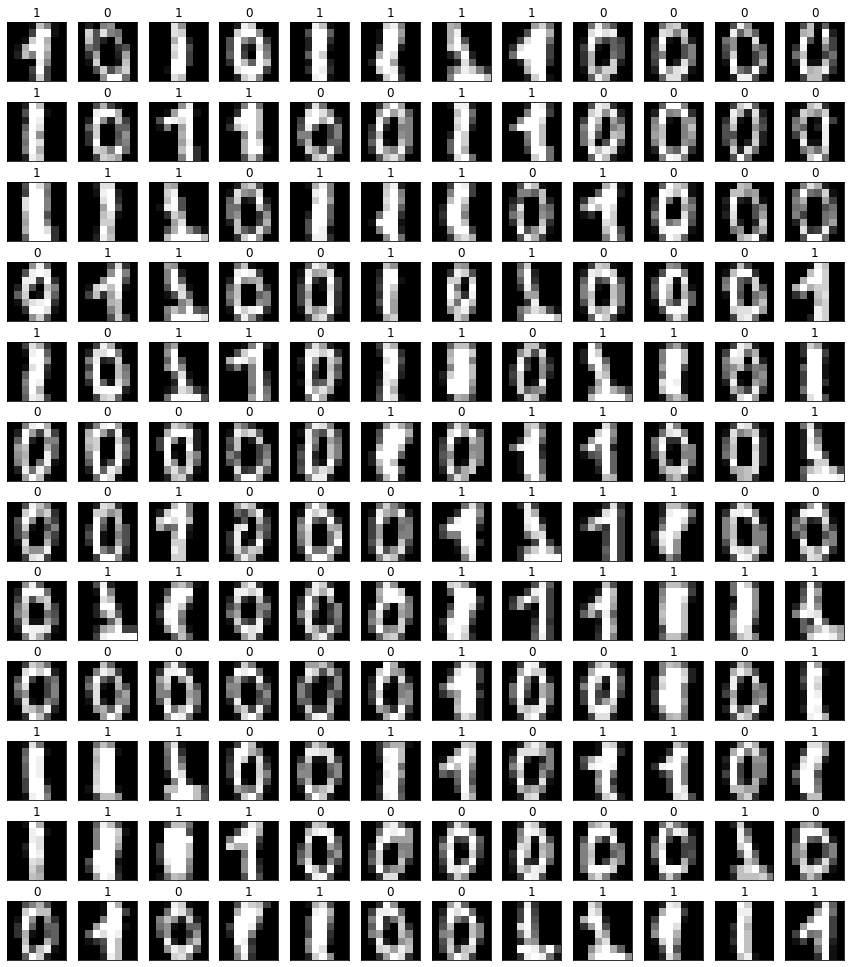

In [12]:
r, c = 12, 12
fig, ax = plt.subplots(r, c, figsize=(15, 15))
cnt = 0
for i in range(r):
    for j in range(c):
        ax[i][j].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax[i][j].imshow(X[cnt].reshape(8, 8), cmap='gray')
        ax[i][j].set_title(f'{y[cnt]}')
        cnt += 1
fig.subplots_adjust(top=1)

In [13]:
model = Sequential([
    tf.keras.Input(shape=(64,)),
    Dense(units=25, activation='sigmoid', name='layer1'),
    Dense(units=15, activation='sigmoid', name='layer2'),
    Dense(units=1, activation='sigmoid', name='layer3'),
], name='Digit_Prediction_Model')
model.summary()

Model: "Digit_Prediction_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                1625      
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

In [15]:
norm = tf.keras.layers.Normalization()
norm.adapt(X)
Xn = norm(X)

In [16]:
model.fit(
    Xn, y,
    epochs=10
);

Epoch 1/10
9/9 [==============================] - 0s 996us/step - loss: 0.2767 - accuracy: 0.8958
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 0s 893us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 0s 873us/step - loss: 8.0941e-04 - accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 0s 873us/step - loss: 5.2765e-04 - accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 0s 873us/step - loss: 4.2472e-04 - accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 0s 873us/step - loss: 3.7593e-04 - accuracy: 1.0000
Epoch 8/10
9/9 [==============================] - 0s 748us/step - loss: 3.4745e-04 - accuracy: 1.0000
Epoch 9/10
9/9 [==============================] - 0s 873us/step - loss: 3.2633e-04 - accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 0s 748us/step - loss: 3.0906e-04 - accuracy: 

Now, use Forward Propagation implemented in Keras libaray to predict the number via its trained W and B

In [17]:
predicted = model.predict(X_test)
yhat = np.array([0 if i < 0.5 else 1 for i in predicted])

3/3 [==============================] - 0s 498us/step


As in the images below, the first number shows the original number and second one shows the predicted outcome of keras Forward Propagation. <br>
Notice some predictions may be wrong.

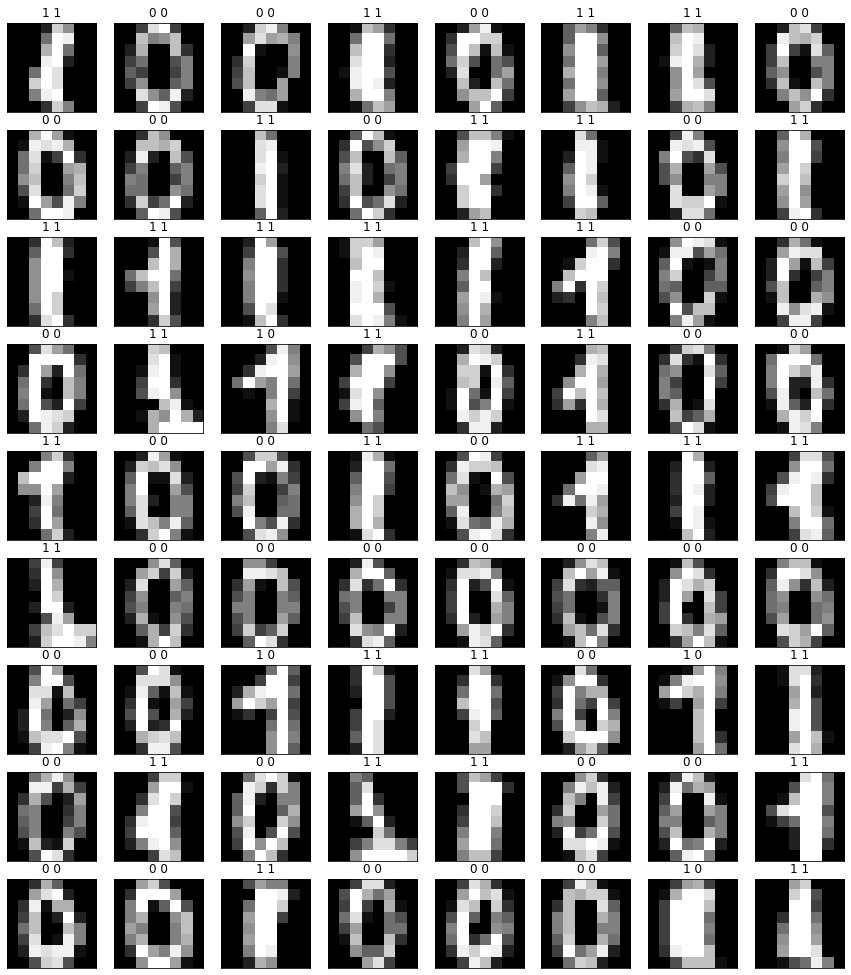

In [18]:
r, c = 9, 8
fig, ax = plt.subplots(r, c, figsize=(15, 15))
cnt = 0
for i in range(r):
    for j in range(c):
        ax[i][j].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax[i][j].imshow(X_test[cnt].reshape(8, 8), cmap='gray')
        ax[i][j].set_title(f'{y_test[cnt]} {yhat[cnt]}')
        cnt += 1
fig.subplots_adjust(top=1)

In [19]:
layer1, layer2, layer3 = model.layers

We have every image to be 8px by 8px that's why we see our $\overrightarrow{x}$ has 64 features for every row. Given 64 features to the first layer, since there are 25 units, there will be 25 columns in W1 and 64 rows. And B1 has only one row with 25 indices. W2 uses 25 features constructed in layer1 and creates 15 features so 25 rows and 15 columns. Also for layer3 . . .<br>
Giving 72 rows with 64 feature to the first layer then results in 25 features since every data is given to each perceptron to create a new data. This is also true for next layers.

In [20]:
W1, B1 = layer1.get_weights()
W2, B2 = layer2.get_weights()
W3, B3 = layer3.get_weights()

print(f'X has {X_test.shape[0]} rows and {X_test.shape[1]} columns')
print(f'W1 has {W1.shape[0]} rows and {W1.shape[1]} columns')
print(f'W2 has {W2.shape[0]} rows and {W2.shape[1]} columns')
print(f'W3 has {W3.shape[0]} rows and {W3.shape[1]} columns')

X has 72 rows and 64 columns
W1 has 64 rows and 25 columns
W2 has 25 rows and 15 columns
W3 has 15 rows and 1 columns


In [21]:
def mySequential(A_in, W1, B1, W2, B2, W3, B3):
    a1 = dense(A_in, W1, B1, sigmoid)
    a2 = dense(a1, W2, B2, sigmoid)
    a3 = dense(a2, W3, B3, sigmoid)
    return a3

In [22]:
my_prediction = mySequential(X_test, W1, B1, W2, B2, W3, B3)

In [23]:
my_yhat = np.array([0 if i < 0.5 else 1 for i in my_prediction])

First number above each image shows the original number; second number shows prediction through forward propagation from keras; third number shows prediction through forward propagation implemented in this notebook.

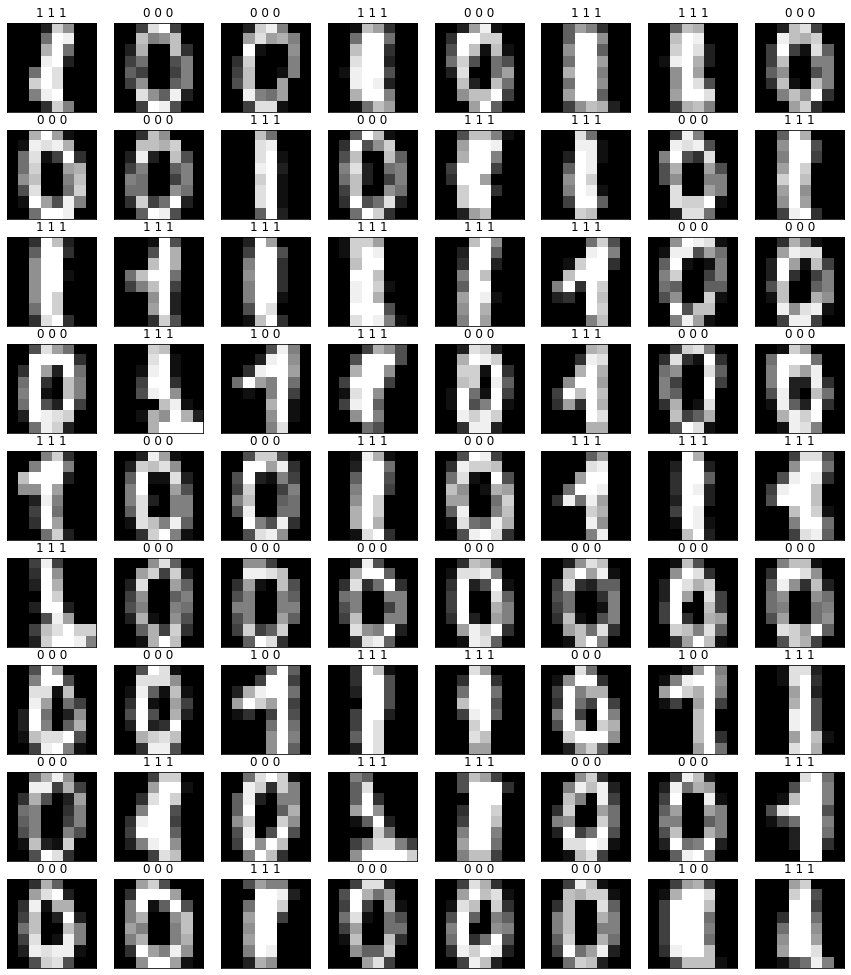

In [24]:
r, c = 9, 8
fig, ax = plt.subplots(r, c, figsize=(15, 15))
cnt = 0
for i in range(r):
    for j in range(c):
        ax[i][j].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax[i][j].imshow(X_test[cnt].reshape(8, 8), cmap='gray')
        ax[i][j].set_title(f'{y_test[cnt]} {yhat[cnt]} {my_yhat[cnt]}')
        cnt += 1
fig.subplots_adjust(top=1)

End.